In [1]:
import os
import sys
import argparse
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt 

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.backends.cudnn as cudnn

from pytvision.transforms.aumentation import  ObjectImageMetadataTransform
from pytvision.transforms import transforms as mtrans

sys.path.append('../')
from torchlib.datasets.factory  import FactoryDataset
from torchlib.datasets.datasets import Dataset

In [2]:
pathname = '~/.datasets'
pathname = os.path.expanduser( pathname )
name_dataset=FactoryDataset.celeba

print(pathname)
print(name_dataset)

/home/fernandez/.datasets
celeba


In [3]:
def visualizatedataset( data, num=25, imsize=(64,64,3), padding=1 ):    
    databatch = torch.zeros( [num, imsize[2], imsize[0], imsize[1]], dtype=torch.float32 )
    for i in range(num): 
        idx = i # np.random.randint( len(data) )
        databatch[i,...] = data[idx]['image']           
    grid = utils.make_grid( databatch , nrow= int(np.sqrt(num)), normalize=True, padding=padding )       
    plt.imshow(grid.numpy().transpose((1, 2, 0)))


In [8]:
imsize = 64
idenselect = []
dataloader = Dataset(
    data=FactoryDataset.factory(
        pathname=pathname, 
        name=name_dataset, 
        subset=FactoryDataset.training, 
        idenselect=idenselect,
        download=True ),
    num_channels=3,
    transform=transforms.Compose([
        mtrans.ToResize( (imsize, imsize), resize_mode='squash', padding_mode=cv2.BORDER_REPLICATE ), 
        mtrans.ToTensor(),
        mtrans.ToNormalization(),
        ])
    )

print( len(dataloader) )
# print(len( dataloader.data.classes ))
# print( dataloader.data.class_to_idx )

202599


torch.Size([64, 64, 3])


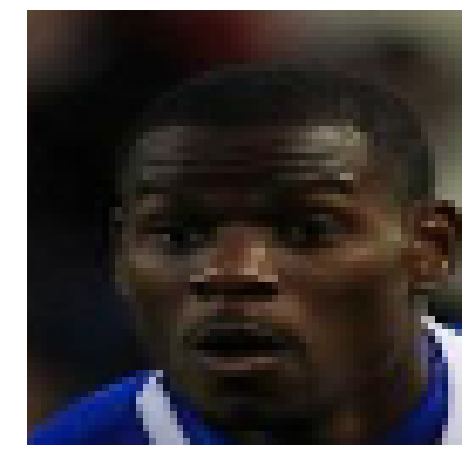

In [22]:
sample = dataloader[ np.random.randint(len(dataloader)) ]
image = sample['image']
image = image.permute( (1,2,0) )

print(image.shape)
plt.figure( figsize=(8,8) )
plt.imshow( image )
plt.axis('off')
plt.show()



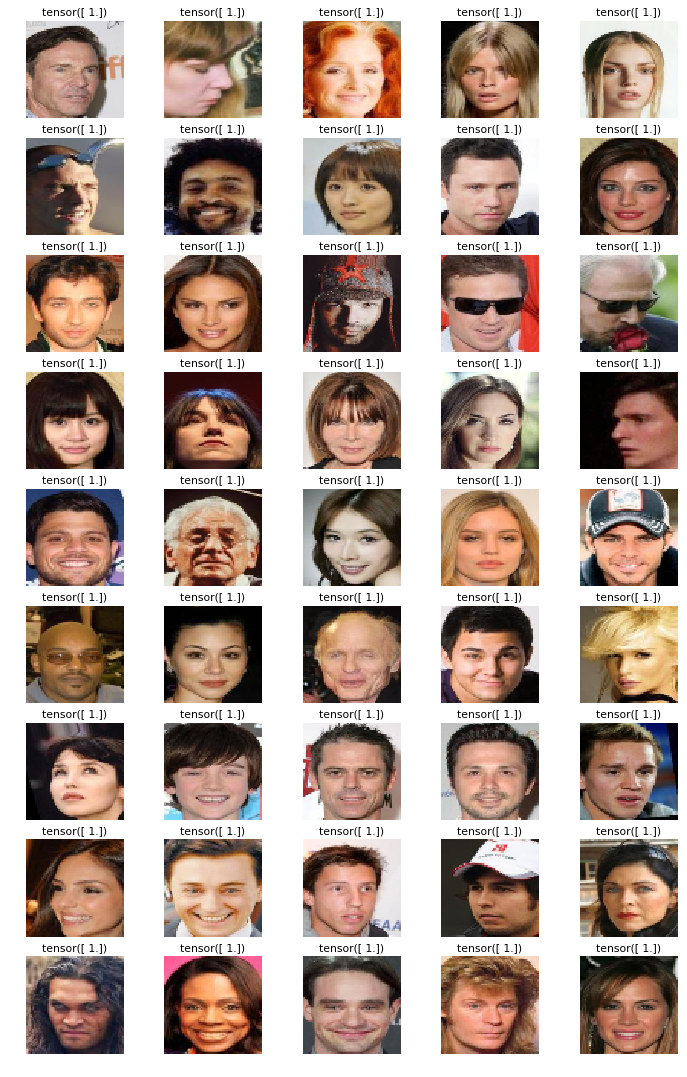

In [26]:
import matplotlib
matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['figure.figsize'] = (12,19)

numRows = 9; numCols = 5

plt.figure()
for k in range(numRows*numCols):
    sample = dataloader[ np.random.randint( len(dataloader) )  ]  
    image, label = sample['image'], sample['label']
    image = image.permute( (1,2,0) )
    
    plt.subplot(numRows,numCols,k+1); 
    plt.imshow( image )
    #plt.imshow( mask[:,:,1], cmap='seismic', alpha=0.2)
    plt.title( label )
    plt.axis('off')

